In [17]:
import pandas as pd
import numpy as np

import itertools

import os
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from joblib import load

import warnings
warnings.filterwarnings('ignore')

In [18]:
# fig.set_size_inches(w=4.7747, h=3.5)
# 5.10686

In [19]:
FOLDER = '26_01_22_14_56_00_gs'
PATH = '../results/' + FOLDER + '/'

In [20]:
models = [
    load(PATH + 'KNNpopularity.joblib'),
    load(PATH + 'MatrixFactorization.joblib'),
    load(PATH + 'ease.joblib')
]

In [21]:
k_list = np.array([v[0]['k'] for v in models[0]])
# k_argsort = np.argsort(k_list)
# k_sorted = k_list[k_argsort]

In [22]:
from dataclasses import dataclass, astuple

@dataclass
class Data:
    recall: float
    coverage: float
    novelty: float
    unexp: float
    rel: float
    
METRICS = list(Data.__annotations__.keys())
METRICS2IDX = dict(zip(METRICS, range(len(METRICS))))

class ModelMetrics:
    def __init__(self):
        self.params = []
        self.data_list = []
        self.is_transformed = []
        self.metrics = []
    
    def add_data(self, params, metric_values):
        self.data_list.append(Data(*map(np.mean, metric_values)))
        self.metrics = np.array([astuple(el) for el in self.data_list])
        self.params.append(params)

    def get(self, metric_name):
        if metric_name == 'serendipity':
            return self.get_serendipity()
        
        return self.metrics[:, METRICS2IDX[metric_name]]
    
    def get_serendipity(self):
        idx = [METRICS2IDX[metric] for metric in ['novelty', 'unexp', 'rel']]
        return self.metrics[:, idx].mean(axis=1)

In [23]:
### KNN
knn_metrics = ModelMetrics()

for i in models[0]:
    knn_metrics.add_data(i[0], i[1:-1])

In [24]:
### Matrix factorization
mf_metrics = ModelMetrics()

for i in models[1]:
    mf_metrics.add_data(i[0], i[1:-1])

In [25]:
### EASE
ease_metrics = ModelMetrics()

for i in models[2]:
    ease_metrics.add_data(i[0], i[1:-1])

In [26]:
width = 0.3
x = np.arange(1, 6)

k_list = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 300, 500, 700, 1000]
components = np.array([5, 10, 20, 50, 100, 200, 500, 1000, 2000])
ease_lambdas = [1.0, 10.0, 50.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2000.0, 5000.0, 10000.0]

In [27]:
ser_label = 'Serendipity'
dataset_name = '1m'
img_folder = 'img/'
img_ext = '.pgf'
path_postfix = ''
if not os.path.exists(PATH + img_folder):
    os.mkdir(PATH + img_folder)

In [28]:
def triple_plot_customization(ax, title, xlabel, ylabel, legend=None, xticks=None, lim_min=None, lim_max=None):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(linewidth=0.5)
    if legend is None:
        ax.legend()
    else:
        ax.legend(loc=legend)
    if xticks is not None:
        ax.set_xticklabels(xticks, rotation=45)
        ax.set_xticks(range(len(xticks)))
    if lim_min is not None and lim_max is not None:
        ax.set_ylim(0.99 * lim_min, 1.01 * lim_max)

# Models overview

In [29]:
def two_columns_versus_plot(common_metric, metric1, metric2, save_name):
    fig, ax = plt.subplots(3, 2, constrained_layout=True, figsize=(12, 10))

    models_dict = [
        {
            'metrics': knn_metrics,
            'model_name': 'KNN popular',
            'params': k_list,
            'param_name': 'K'
        },
        {
            'metrics': mf_metrics,
            'model_name': 'Matrix factorization',
            'params': components,
            'param_name': 'Number of components'
        },
        {
            'metrics': ease_metrics,
            'model_name': 'EASE',
            'params': ease_lambdas,
            'param_name': 'Regularization strength'
        }
    ]
    
    for i, d in enumerate(models_dict):
        ax[i, 0].plot(range(len(d['params'])), d['metrics'].get(common_metric), 'o-', label=common_metric.title(), color='C0')
        ax[i, 0].plot(range(len(d['params'])), d['metrics'].get(metric1), 'o-', label=metric1.title(), color='C1')
        
        ax[i, 1].plot(range(len(d['params'])), d['metrics'].get(common_metric), 'o-', label=common_metric.title(), color='C0')
        ax[i, 1].plot(range(len(d['params'])), d['metrics'].get(metric2), 'o-', label=metric2.title(), color='C2')
        
        triple_plot_customization(ax[i, 0], d['model_name'], d['param_name'], 'Metric value', xticks=d['params'])
        triple_plot_customization(ax[i, 1], d['model_name'], d['param_name'], 'Metric value', xticks=d['params'])

    plt.savefig(PATH + img_folder + f'{save_name}' + path_postfix + img_ext);

In [30]:
for m1, m2 in [('coverage', 'serendipity'), ('serendipity', 'novelty'), ('serendipity', 'unexp'), ('serendipity', 'rel')]:
    common_metric = 'recall'
    metric1, metric2 = m1, m2
    file_name = f'{common_metric}_{metric1}_vs_{common_metric}_{metric2}'
    two_columns_versus_plot(common_metric, metric1, metric2, file_name)

pdflatex: major issue: So far, you have not checked for MiKTeX updates.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/71/5zq63fz506qb0196k6fbp3sh0000gn/T/ipykernel_1831/354526898.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/71/5zq63fz506qb0196k6fbp3sh0000gn/T/ipykernel_1831/354526898.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/71/5zq63fz506qb0196k6fbp3sh0000gn/T/ipykernel_1831/354526898.py:11: UserWarning: FixedFormatter should only be used toge

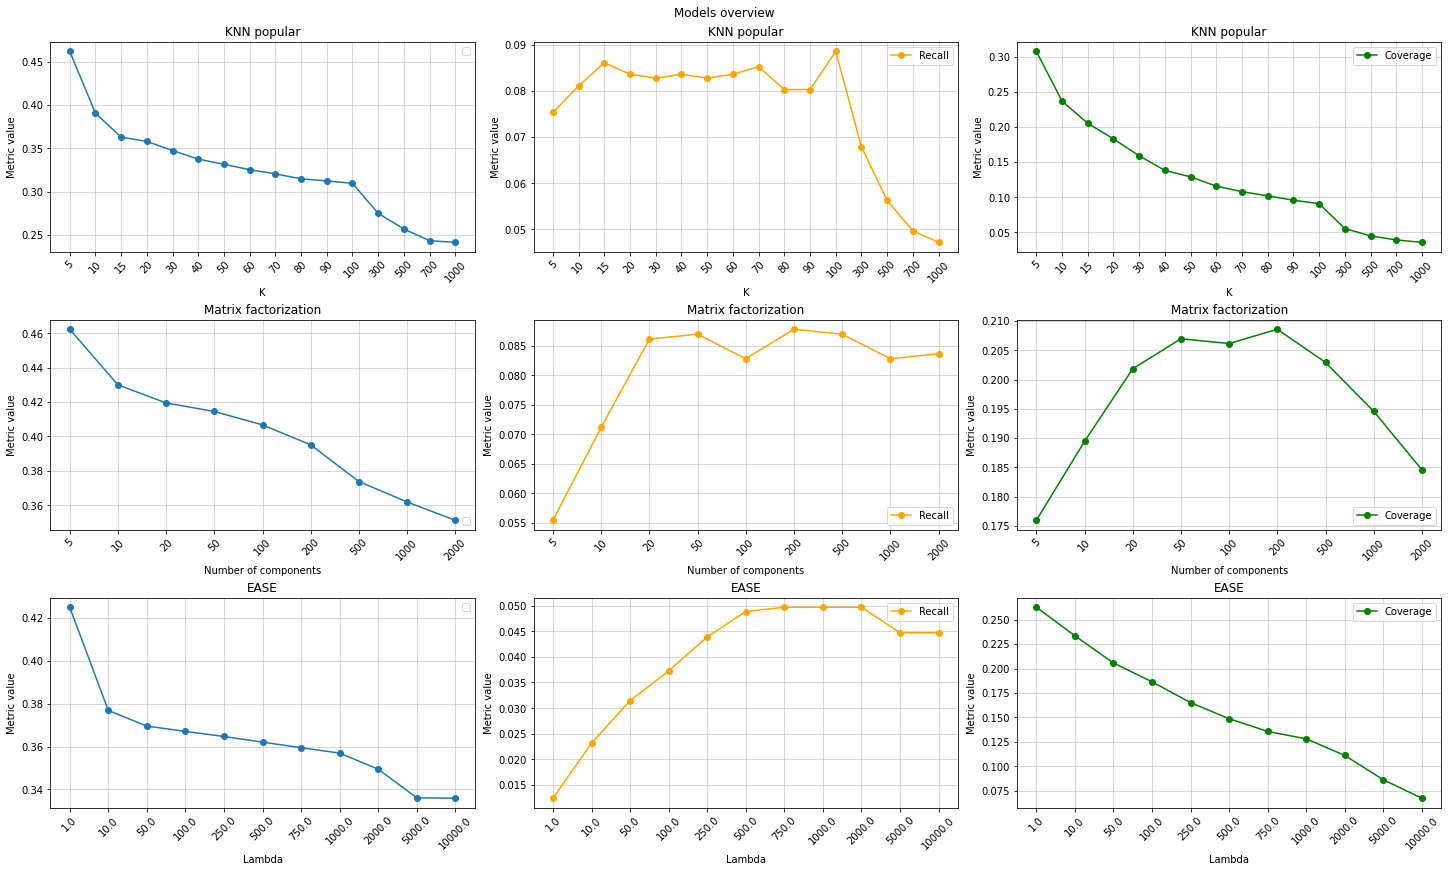

In [95]:
fig, ax = plt.subplots(3, 3, constrained_layout=True, figsize=(20, 12))
fig.suptitle('Models overview')

plt.title('MovieLens-{}'.format(dataset_name))

ax[0, 0].plot(range(len(k_list)), knn_metrics.get_serendipity(), 'o-', label=ser_label, color='C0')
ax[0, 1].plot(range(len(k_list)), knn_metrics.get('recall'), 'o-', label='Recall', color='orange')
ax[0, 2].plot(range(len(k_list)), knn_metrics.get('coverage'), 'o-', label='Coverage', color='green')
triple_plot_customization(ax[0, 0], 'KNN popular', 'K', 'Metric value', xticks=k_list)
triple_plot_customization(ax[0, 1], 'KNN popular', 'K', 'Metric value', xticks=k_list)
triple_plot_customization(ax[0, 2], 'KNN popular', 'K', 'Metric value', xticks=k_list)

ax[1, 0].plot(range(len(components)), mf_metrics.get_serendipity(), 'o-', label=ser_label)
ax[1, 1].plot(range(len(components)), mf_metrics.get('recall'), 'o-', label='Recall', color='orange')
ax[1, 2].plot(range(len(components)), mf_metrics.get('coverage'), 'o-', label='Coverage', color='green')
triple_plot_customization(ax[1, 0], 'Matrix factorization', 'Number of components', 'Metric value', legend='lower right', xticks=components)
triple_plot_customization(ax[1, 1], 'Matrix factorization', 'Number of components', 'Metric value', legend='lower right', xticks=components)
triple_plot_customization(ax[1, 2], 'Matrix factorization', 'Number of components', 'Metric value', legend='lower right', xticks=components)

ax[2, 0].plot(range(len(ease_lambdas)), ease_metrics.get_serendipity(), 'o-', label=ser_label)
ax[2, 1].plot(range(len(ease_lambdas)), ease_metrics.get('recall'), 'o-', label='Recall', color='orange')
ax[2, 2].plot(range(len(ease_lambdas)), ease_metrics.get('coverage'), 'o-', label='Coverage', color='green')
triple_plot_customization(ax[2, 0], 'EASE', 'Lambda', 'Metric value', xticks=ease_lambdas)
triple_plot_customization(ax[2, 1], 'EASE', 'Lambda', 'Metric value', xticks=ease_lambdas)
triple_plot_customization(ax[2, 2], 'EASE', 'Lambda', 'Metric value', xticks=ease_lambdas)

# plt.savefig(PATH + img_folder + '3models' + path_postfix + img_ext);

# Models overview (absolute)

c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


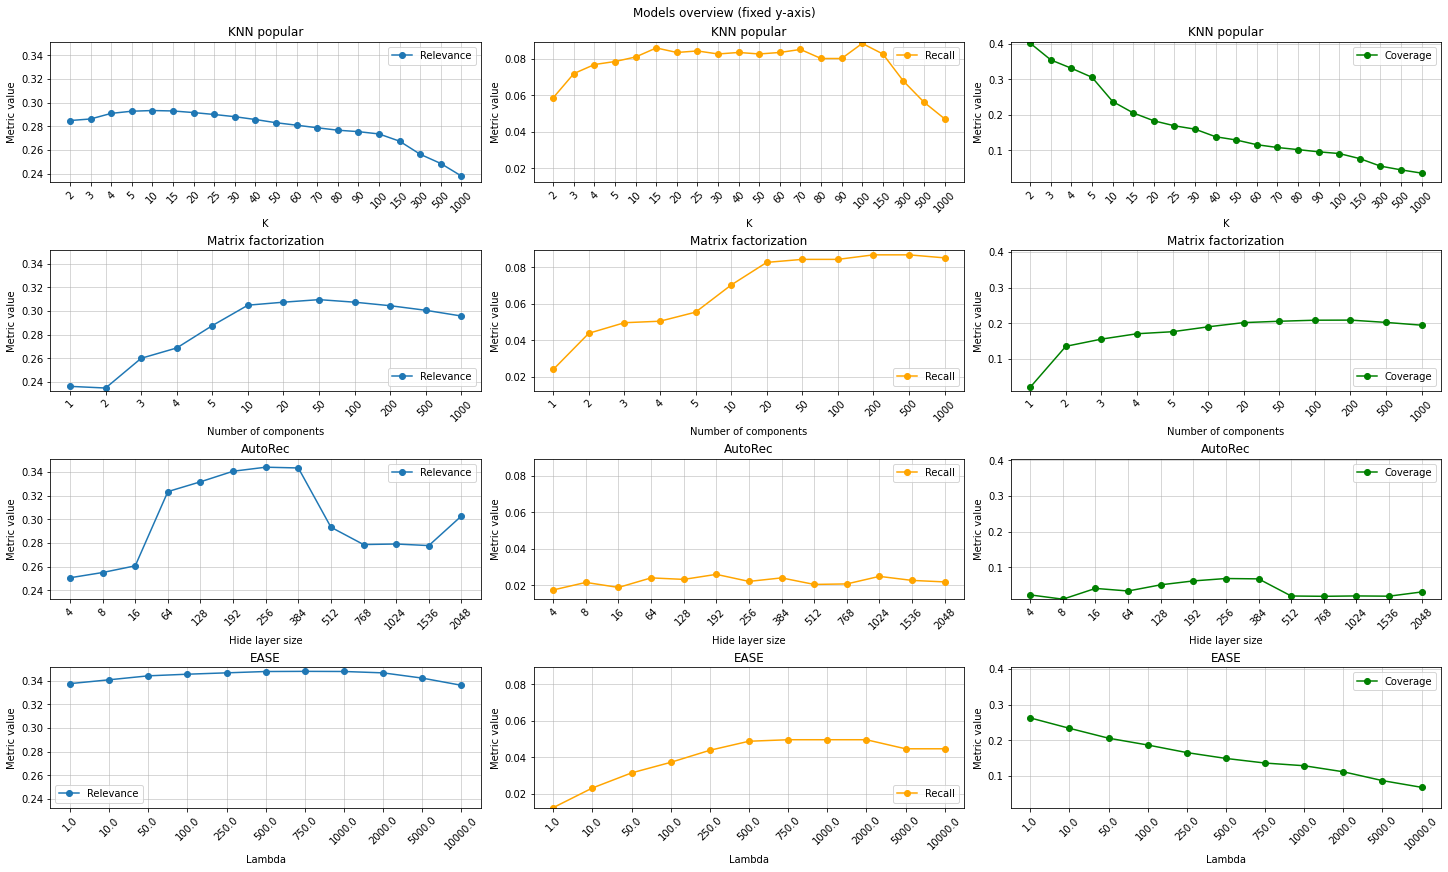

In [118]:
fig, ax = plt.subplots(4, 3, constrained_layout=True, figsize=(20, 12))
fig.suptitle('Models overview (fixed y-axis)')

plt.title('MovieLens-{}'.format(dataset_name))

ax[0, 0].plot(range(len(k_list)), knn_serendipity, 'o-', label=ser_label, color='C0')
# ax[0, 0].plot(range(len(k_list)), knn_b0_serendipity, 'o--', label=ser_label + r', $\beta=0$', color='C0')
ax[0, 1].plot(range(len(k_list)), knn_recall, 'o-', label='Recall', color='orange')
# ax[0, 1].plot(range(len(k_list)), knn_b0_recall, 'o--', label=r'Recall, $\beta=0$', color='orange')
ax[0, 2].plot(range(len(k_list)), knn_coverage, 'o-', label='Coverage', color='green')
# ax[0, 2].plot(range(len(k_list)), knn_b0_coverage, 'o--', label=r'Coverage, $\beta=0$', color='green')
triple_plot_customization(ax[0, 0], 'KNN popular', 'K', 'Metric value', xticks=k_list, lim_min=min_serendipity, lim_max=max_serendipity)
triple_plot_customization(ax[0, 1], 'KNN popular', 'K', 'Metric value', xticks=k_list, lim_min=min_recall, lim_max=max_recall)
triple_plot_customization(ax[0, 2], 'KNN popular', 'K', 'Metric value', xticks=k_list, lim_min=min_coverage, lim_max=max_coverage)

ax[1, 0].plot(range(len(components)), mf_serendipity, 'o-', label=ser_label)
ax[1, 1].plot(range(len(components)), mf_recall, 'o-', label='Recall', color='orange')
ax[1, 2].plot(range(len(components)), mf_coverage, 'o-', label='Coverage', color='green')
triple_plot_customization(ax[1, 0], 'Matrix factorization', 'Number of components', 'Metric value', legend='lower right', xticks=components, lim_min=min_serendipity, lim_max=max_serendipity)
triple_plot_customization(ax[1, 1], 'Matrix factorization', 'Number of components', 'Metric value', legend='lower right', xticks=components, lim_min=min_recall, lim_max=max_recall)
triple_plot_customization(ax[1, 2], 'Matrix factorization', 'Number of components', 'Metric value', legend='lower right', xticks=components, lim_min=min_coverage, lim_max=max_coverage)

ax[2, 0].plot(range(len(layers)), autorec_serendipity, 'o-', label=ser_label)
ax[2, 1].plot(range(len(layers)), autorec_recall, 'o-', label='Recall', color='orange')
ax[2, 2].plot(range(len(layers)), autorec_coverage, 'o-', label='Coverage', color='green')
triple_plot_customization(ax[2, 0], 'AutoRec', 'Hide layer size', 'Metric value', xticks=layers, lim_min=min_serendipity, lim_max=max_serendipity)
triple_plot_customization(ax[2, 1], 'AutoRec', 'Hide layer size', 'Metric value', xticks=layers, lim_min=min_recall, lim_max=max_recall)
triple_plot_customization(ax[2, 2], 'AutoRec', 'Hide layer size', 'Metric value', xticks=layers, lim_min=min_coverage, lim_max=max_coverage)

ax[3, 0].plot(range(len(ease_lambdas)), ease_serendipity, 'o-', label=ser_label)
ax[3, 1].plot(range(len(ease_lambdas)), ease_recall, 'o-', label='Recall', color='orange')
ax[3, 2].plot(range(len(ease_lambdas)), ease_coverage, 'o-', label='Coverage', color='green')
triple_plot_customization(ax[3, 0], 'EASE', 'Lambda', 'Metric value', xticks=ease_lambdas, lim_min=min_serendipity, lim_max=max_serendipity)
triple_plot_customization(ax[3, 1], 'EASE', 'Lambda', 'Metric value', xticks=ease_lambdas, legend='lower right', lim_min=min_recall, lim_max=max_recall)
triple_plot_customization(ax[3, 2], 'EASE', 'Lambda', 'Metric value', xticks=ease_lambdas, lim_min=min_coverage, lim_max=max_coverage)

plt.savefig(PATH + img_folder + '3models_absolute' + path_postfix + img_ext);

# Recall versus serendipity

In [97]:
font_size = 11

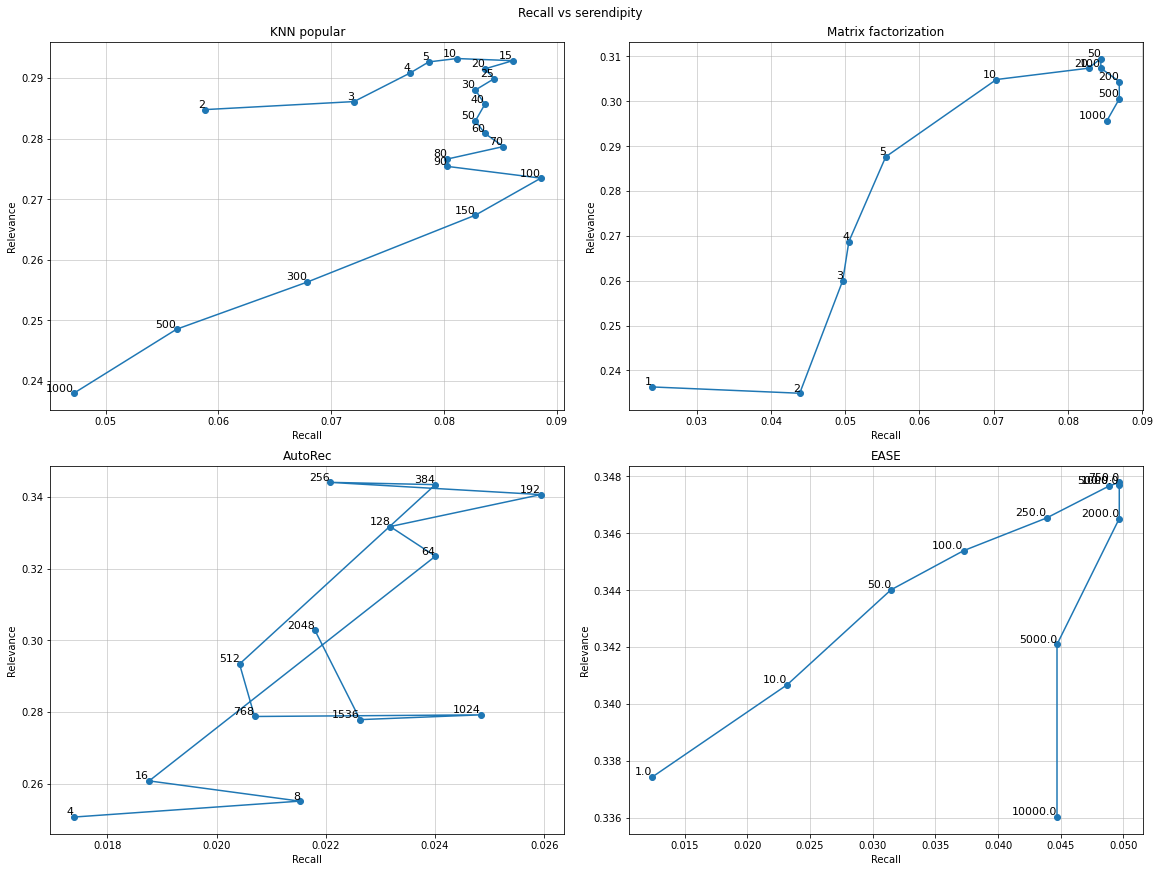

In [120]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 12))
fig.suptitle('Recall vs serendipity')

plt.title('Recall versus serendipity (MovieLens-{})'.format(dataset_name))

ax[0, 0].plot(knn_recall, knn_serendipity, 'o-')
tmp = zip(knn_recall, knn_serendipity)
for i, p in enumerate(tmp):
    ax[0, 0].text(p[0], p[1], k_list[i], fontsize=font_size, ha='right',va='bottom')

# ax[0].plot(knn_b0_recall, knn_b0_serendipity, 'o--', label=r'$\beta=0$')
# tmp = zip(knn_b0_recall, knn_b0_serendipity)
# for i, p in enumerate(tmp):
#     ax[0].text(p[0], p[1], k_list[i], fontsize=11, ha='right',va='bottom')

ax[0, 0].set_title('KNN popular')
ax[0, 0].set_xlabel('Recall')
ax[0, 0].set_ylabel(ser_label)
ax[0, 0].grid(linewidth=0.5)

ax[0, 1].plot(mf_recall, mf_serendipity, 'o-')
tmp = zip(mf_recall, mf_serendipity)
for i, p in enumerate(tmp):
    ax[0, 1].text(p[0], p[1], components[i], fontsize=font_size, ha='right',va='bottom')
ax[0, 1].set_title('Matrix factorization')
ax[0, 1].set_xlabel('Recall')
ax[0, 1].set_ylabel(ser_label)
ax[0, 1].grid(linewidth=0.5)

ax[1, 0].plot(autorec_recall, autorec_serendipity, 'o-', label='Serendipity')
tmp = zip(autorec_recall, autorec_serendipity)
for i, p in enumerate(tmp):
    ax[1, 0].text(p[0], p[1], layers[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 0].set_title('AutoRec')
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel(ser_label)
ax[1, 0].grid(linewidth=0.5)

ax[1, 1].plot(ease_recall, ease_serendipity, 'o-', label='Serendipity')
tmp = zip(ease_recall, ease_serendipity)
for i, p in enumerate(tmp):
    ax[1, 1].text(p[0], p[1], ease_lambdas[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 1].set_title('EASE')
ax[1, 1].set_xlabel('Recall')
ax[1, 1].set_ylabel(ser_label)
ax[1, 1].grid(linewidth=0.5)

plt.savefig(PATH + img_folder + 'recall_vs_serendipity' + path_postfix + img_ext);

# Recall versus serendipity (absolute)

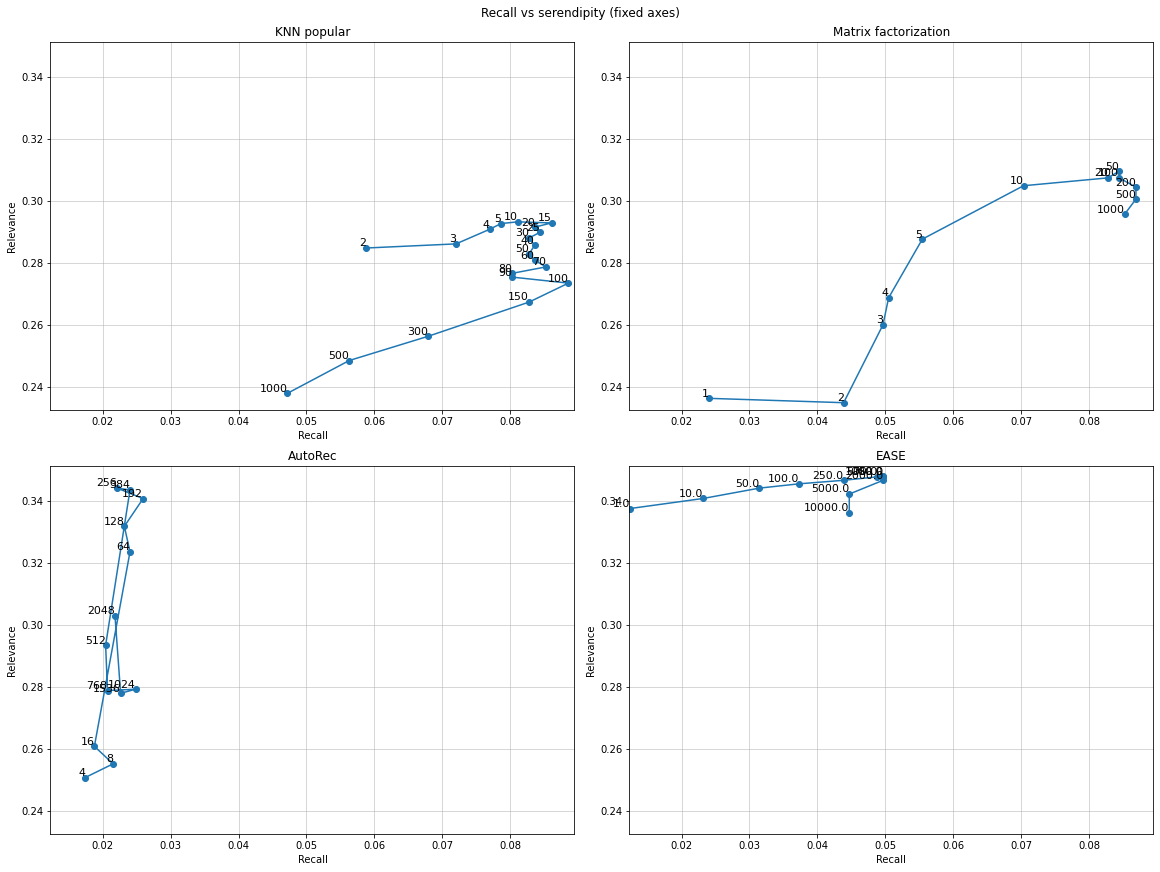

In [121]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 12))
fig.suptitle('Recall vs serendipity (fixed axes)')

plt.title('Recall versus serendipity (MovieLens-{})'.format(dataset_name))

ax[0, 0].plot(knn_recall, knn_serendipity, 'o-')
tmp = zip(knn_recall, knn_serendipity)
for i, p in enumerate(tmp):
    ax[0, 0].text(p[0], p[1], k_list[i], fontsize=font_size, ha='right',va='bottom')

# ax[0].plot(knn_b0_recall, knn_b0_serendipity, 'o--', label=r'$\beta=0$')
# tmp = zip(knn_b0_recall, knn_b0_serendipity)
# for i, p in enumerate(tmp):
#     ax[0].text(p[0], p[1], k_list[i], fontsize=11, ha='right',va='bottom')

ax[0, 0].set_title('KNN popular')
ax[0, 0].set_xlabel('Recall')
ax[0, 0].set_ylabel(ser_label)
ax[0, 0].set_xlim(0.99 * min_recall, 1.01 * max_recall)
ax[0, 0].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[0, 0].grid(linewidth=0.5)

ax[0, 1].plot(mf_recall, mf_serendipity, 'o-')
tmp = zip(mf_recall, mf_serendipity)
for i, p in enumerate(tmp):
    ax[0, 1].text(p[0], p[1], components[i], fontsize=font_size, ha='right',va='bottom')
ax[0, 1].set_title('Matrix factorization')
ax[0, 1].set_xlabel('Recall')
ax[0, 1].set_ylabel(ser_label)
ax[0, 1].set_xlim(0.99 * min_recall, 1.01 * max_recall)
ax[0, 1].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[0, 1].grid(linewidth=0.5)

ax[1, 0].plot(autorec_recall, autorec_serendipity, 'o-', label='Serendipity')
tmp = zip(autorec_recall, autorec_serendipity)
for i, p in enumerate(tmp):
    ax[1, 0].text(p[0], p[1], layers[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 0].set_title('AutoRec')
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel(ser_label)
ax[1, 0].set_xlim(0.99 * min_recall, 1.01 * max_recall)
ax[1, 0].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[1, 0].grid(linewidth=0.5)

ax[1, 1].plot(ease_recall, ease_serendipity, 'o-', label='Serendipity')
tmp = zip(ease_recall, ease_serendipity)
for i, p in enumerate(tmp):
    ax[1, 1].text(p[0], p[1], ease_lambdas[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 1].set_title('EASE')
ax[1, 1].set_xlabel('Recall')
ax[1, 1].set_ylabel(ser_label)
ax[1, 1].set_xlim(0.99 * min_recall, 1.01 * max_recall)
ax[1, 1].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[1, 1].grid(linewidth=0.5)

plt.savefig(PATH + img_folder + 'recall_vs_serendipity_absolute' + path_postfix + img_ext);

# Coverage versus serendipity

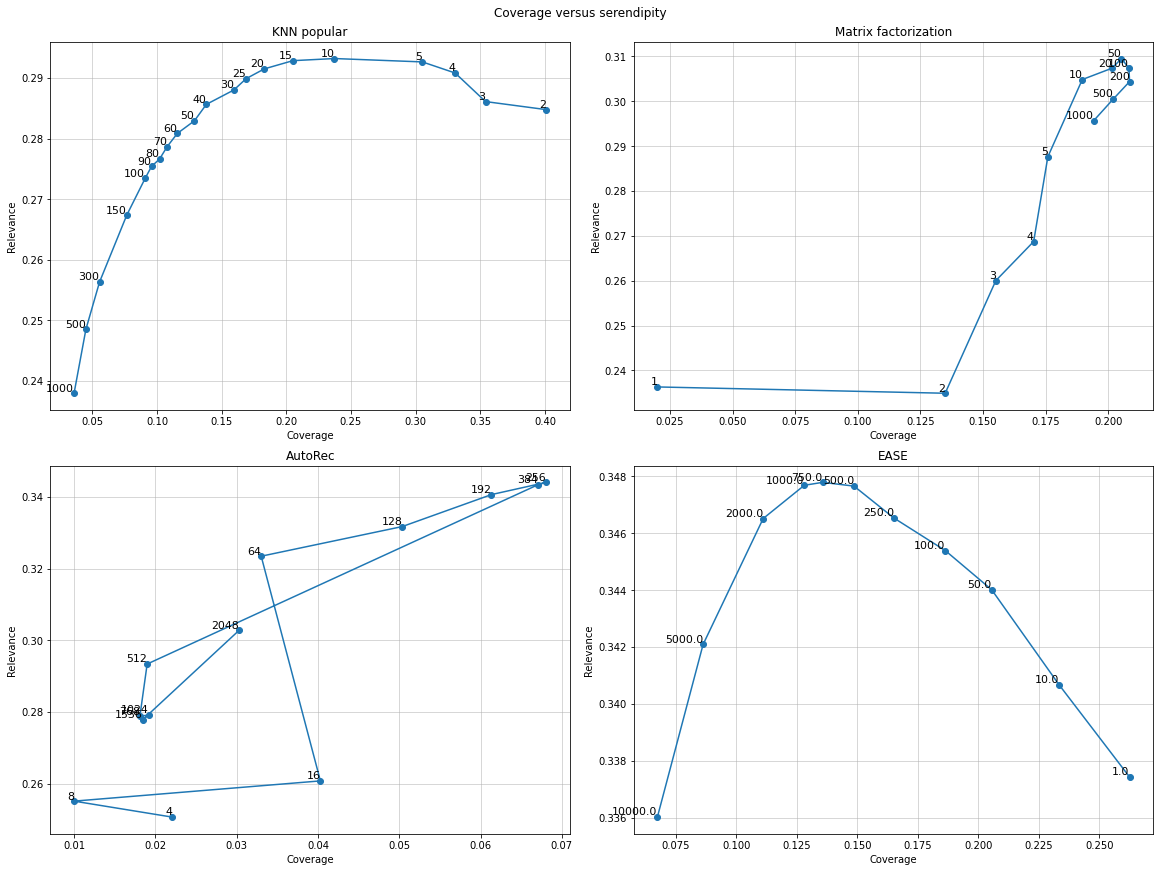

In [122]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 12))

fig.suptitle('Coverage versus serendipity')

ax[0, 0].plot(knn_coverage, knn_serendipity, 'o-')
tmp = zip(knn_coverage, knn_serendipity)
for i, p in enumerate(tmp):
    ax[0, 0].text(p[0], p[1], k_list[i], fontsize=font_size, ha='right',va='bottom')

# ax[0].plot(knn_b0_coverage, knn_b0_serendipity, 'o--', label=r'$\beta=0$')
# tmp = zip(knn_b0_coverage, knn_b0_serendipity)
# for i, p in enumerate(tmp):
#     ax[0].text(p[0], p[1], k_list[i], fontsize=11, ha='right',va='bottom')
    
ax[0, 0].set_title('KNN popular')
ax[0, 0].set_xlabel('Coverage')
ax[0, 0].set_ylabel(ser_label)
ax[0, 0].grid(linewidth=0.5)


ax[0, 1].plot(mf_coverage, mf_serendipity, 'o-')
tmp = zip(mf_coverage, mf_serendipity)
for i, p in enumerate(tmp):
    ax[0, 1].text(p[0], p[1], components[i], fontsize=font_size, ha='right',va='bottom')
ax[0, 1].set_title('Matrix factorization')
ax[0, 1].set_xlabel('Coverage')
ax[0, 1].set_ylabel(ser_label)
ax[0, 1].grid(linewidth=0.5)

ax[1, 0].plot(autorec_coverage, autorec_serendipity, 'o-', label='Serendipity')
tmp = zip(autorec_coverage, autorec_serendipity)
for i, p in enumerate(tmp):
    ax[1, 0].text(p[0], p[1], layers[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 0].set_title('AutoRec')
ax[1, 0].set_xlabel('Coverage')
ax[1, 0].set_ylabel(ser_label)
ax[1, 0].grid(linewidth=0.5)

ax[1, 1].plot(ease_coverage, ease_serendipity, 'o-', label='Serendipity')
tmp = zip(ease_coverage, ease_serendipity)
for i, p in enumerate(tmp):
    ax[1, 1].text(p[0], p[1], ease_lambdas[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 1].set_title('EASE')
ax[1, 1].set_xlabel('Coverage')
ax[1, 1].set_ylabel(ser_label)
ax[1, 1].grid(linewidth=0.5)

plt.savefig(PATH + img_folder + 'coverage_vs_serendipity' + path_postfix + img_ext);

# Coverage versus serendipity (absolute)

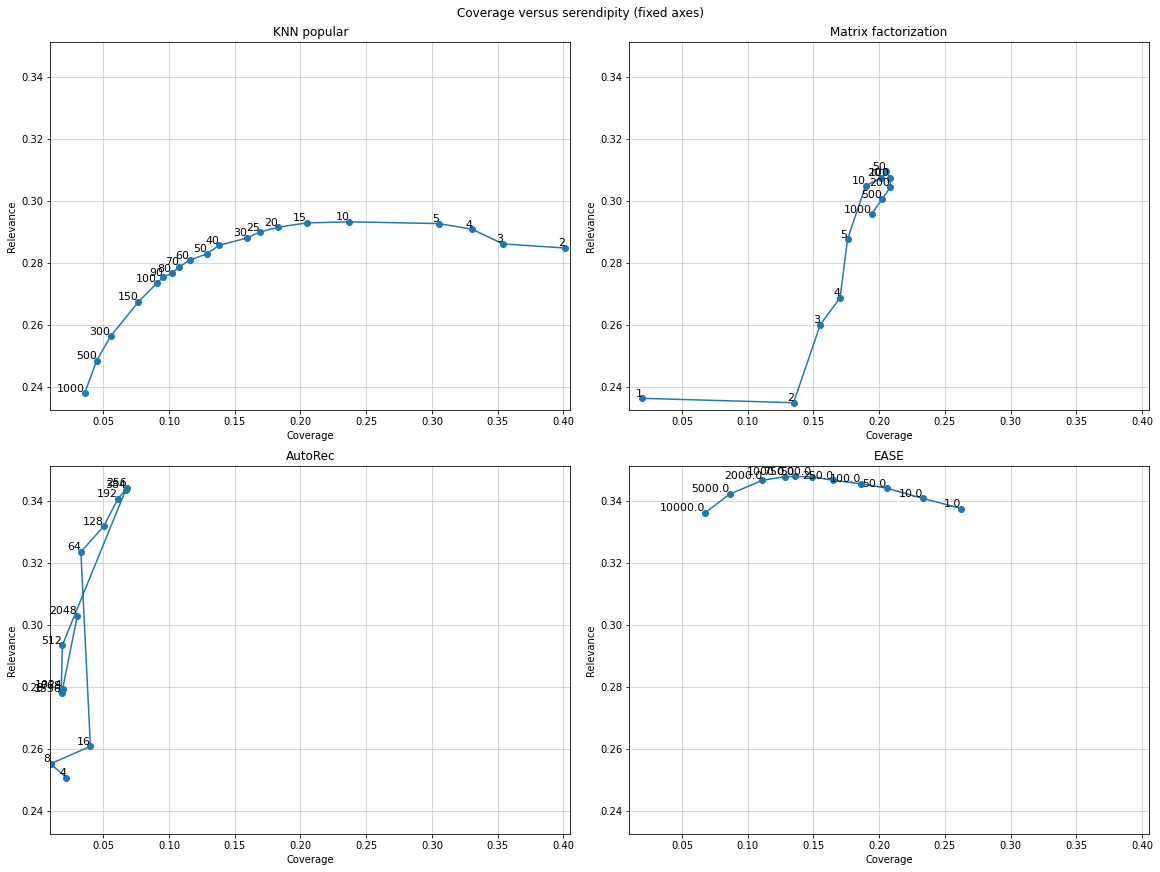

In [123]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 12))

fig.suptitle('Coverage versus serendipity (fixed axes)')

ax[0, 0].plot(knn_coverage, knn_serendipity, 'o-')
tmp = zip(knn_coverage, knn_serendipity)
for i, p in enumerate(tmp):
    ax[0, 0].text(p[0], p[1], k_list[i], fontsize=font_size, ha='right',va='bottom')

# ax[0].plot(knn_b0_coverage, knn_b0_serendipity, 'o--', label=r'$\beta=0$')
# tmp = zip(knn_b0_coverage, knn_b0_serendipity)
# for i, p in enumerate(tmp):
#     ax[0].text(p[0], p[1], k_list[i], fontsize=11, ha='right',va='bottom')
    
ax[0, 0].set_title('KNN popular')
ax[0, 0].set_xlabel('Coverage')
ax[0, 0].set_ylabel(ser_label)
ax[0, 0].set_xlim(0.99 * min_coverage, 1.01 * max_coverage)
ax[0, 0].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[0, 0].grid(linewidth=0.5)


ax[0, 1].plot(mf_coverage, mf_serendipity, 'o-')
tmp = zip(mf_coverage, mf_serendipity)
for i, p in enumerate(tmp):
    ax[0, 1].text(p[0], p[1], components[i], fontsize=font_size, ha='right',va='bottom')
ax[0, 1].set_title('Matrix factorization')
ax[0, 1].set_xlabel('Coverage')
ax[0, 1].set_ylabel(ser_label)
ax[0, 1].set_xlim(0.99 * min_coverage, 1.01 * max_coverage)
ax[0, 1].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[0, 1].grid(linewidth=0.5)

ax[1, 0].plot(autorec_coverage, autorec_serendipity, 'o-', label='Serendipity')
tmp = zip(autorec_coverage, autorec_serendipity)
for i, p in enumerate(tmp):
    ax[1, 0].text(p[0], p[1], layers[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 0].set_title('AutoRec')
ax[1, 0].set_xlabel('Coverage')
ax[1, 0].set_ylabel(ser_label)
ax[1, 0].set_xlim(0.99 * min_coverage, 1.01 * max_coverage)
ax[1, 0].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[1, 0].grid(linewidth=0.5)

ax[1, 1].plot(ease_coverage, ease_serendipity, 'o-', label='Serendipity')
tmp = zip(ease_coverage, ease_serendipity)
for i, p in enumerate(tmp):
    ax[1, 1].text(p[0], p[1], ease_lambdas[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 1].set_title('EASE')
ax[1, 1].set_xlabel('Coverage')
ax[1, 1].set_ylabel(ser_label)
ax[1, 1].set_xlim(0.99 * min_coverage, 1.01 * max_coverage)
ax[1, 1].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[1, 1].grid(linewidth=0.5)

plt.savefig(PATH + img_folder + 'coverage_vs_serendipity_absolute' + path_postfix + img_ext);

In [ ]:
fig = plt.figure(figsize=(30, 6))
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(knn_recall, knn_coverage, knn_serendipity, 'o-')
z = zip(knn_recall, knn_coverage, knn_serendipity)
for i, zz in enumerate(z):
    ax.text(zz[0], zz[1], zz[2], k_list[i], fontsize=8, ha='right',va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Coverage')
ax.set_zlabel(ser_label)
ax.title.set_text('KNN popular')

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(mf_recall, mf_coverage, mf_serendipity, 'o-')
z = zip(mf_recall, mf_coverage, mf_serendipity)
for i, zz in enumerate(z):
    ax.text(zz[0], zz[1], zz[2], components[i], fontsize=8, ha='right',va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Coverage')
ax.set_zlabel(ser_label)
ax.title.set_text('Matrix factorization')

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(autorec_recall, autorec_coverage, autorec_serendipity, 'o-')
z = zip(autorec_recall, autorec_coverage, autorec_serendipity)
for i, zz in enumerate(z):
    ax.text(zz[0], zz[1], zz[2], layers[i], fontsize=8, ha='right',va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Coverage')
ax.set_zlabel(ser_label)
ax.title.set_text('AutoRec')

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(ease_recall, ease_coverage, ease_serendipity, 'o-')
z = zip(ease_recall, ease_coverage, ease_serendipity)
for i, zz in enumerate(z):
    ax.text(zz[0], zz[1], zz[2], layers[i], fontsize=8, ha='right',va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Coverage')
ax.set_zlabel(ser_label)
ax.title.set_text('EASE')

plt.savefig(PATH + img_folder + '3d_models' + path_postfix + img_ext);

# plt.show()

## Serendipity and recall correlation

In [ ]:
np.corrcoef(knn_serendipity, knn_recall)

In [ ]:
np.corrcoef(mf_serendipity, mf_recall)

In [ ]:
np.corrcoef(autorec_serendipity, autorec_recall)

## Serendipity and coverage correlation

In [ ]:
np.corrcoef(knn_serendipity, knn_coverage)

In [ ]:
np.corrcoef(mf_serendipity_2, mf_coverage_2)

In [ ]:
np.corrcoef(autorec_serendipity, autorec_coverage)

In [ ]:
models_named = {
    'KNN': models[0],
    'MF': models[1],
    'AutoRec': models[2]
}

helpers = {
    'KNN': 'k=',
    'MF': 'SVD, n\\textunderscore comp=',
    'AutoRec': 'hide\\textunderscore layer='
}

helpers2 = {
    'KNN': 'K',
    'MF': 'n_components',
    'AutoRec': 'hide_layer'
}

In [ ]:
for k, i in models_named.items():
    for kk, ii in i.items():
        serendipity = kk
        params, recall, coverage, time = ii
        print('{} ({}{}) & {:.3f} & {:.3f} & {:.3f} & {:.0f} \\\\'.format(k, helpers[k], params[helpers2[k]], serendipity, recall, coverage, time))

In [ ]:
for kk, ii in knn_beta0.items():
    serendipity = kk
    params, recall, coverage, time = ii
    print(r'KNN, $\beta=0$ (k={}) & {:.3f} & {:.3f} & {:.3f} & {:.0f} \\'.format(params['K'], serendipity, recall, coverage, time))